In [3]:
import numpy as np
import scipy
from scipy.fftpack import fft, ifft, fftfreq
from scipy.signal import chirp
import matplotlib.pyplot as plt

<h1>TASK1</h1>

<p>Реализовать вейвлет Морле во временном пространстве. Посмотреть его
спектр. Формулы вейвлета Морле и результат приведены на рис. 1.</p>

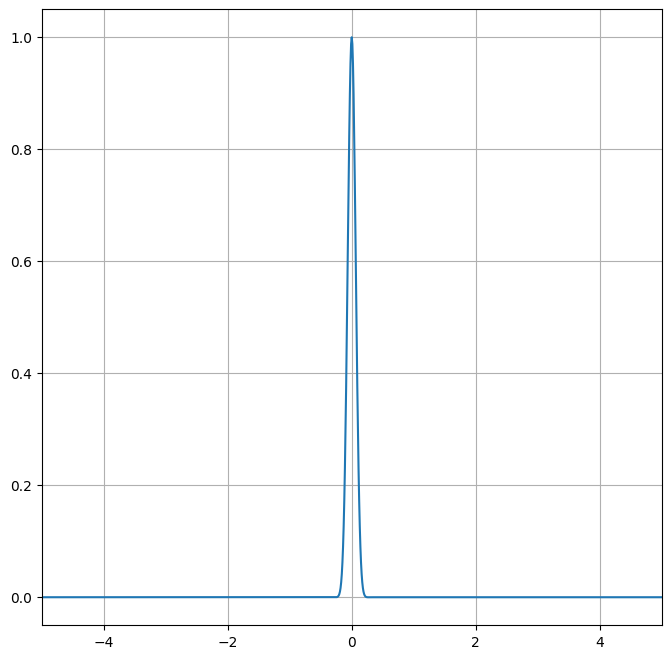

In [88]:
def morle_w(x,a):
    i = 1j
    return np.exp(-1 * x**2 / a**2) * np.exp(i * 2 * x * np.pi)

def morle_s(w):
    w = 2*np.pi*w
    a = np.sqrt(2)
    return a * np.sqrt(np.pi) * np.exp(-a**2 * (2*np.pi - w)**2 / 4)

morle_wave = np.vectorize(morle_w)
morle_spectre = np.vectorize(morle_s)

fig = plt.figure(figsize=(8,8)) # размер полотна
x = np.arange(-100, 100, 0.01)
y = morle_wave(x, 0.1)
plt.xlim(-5,5)
plt.plot(x, y)
plt.grid()

Text(0, 0.5, 'Амплитуда')

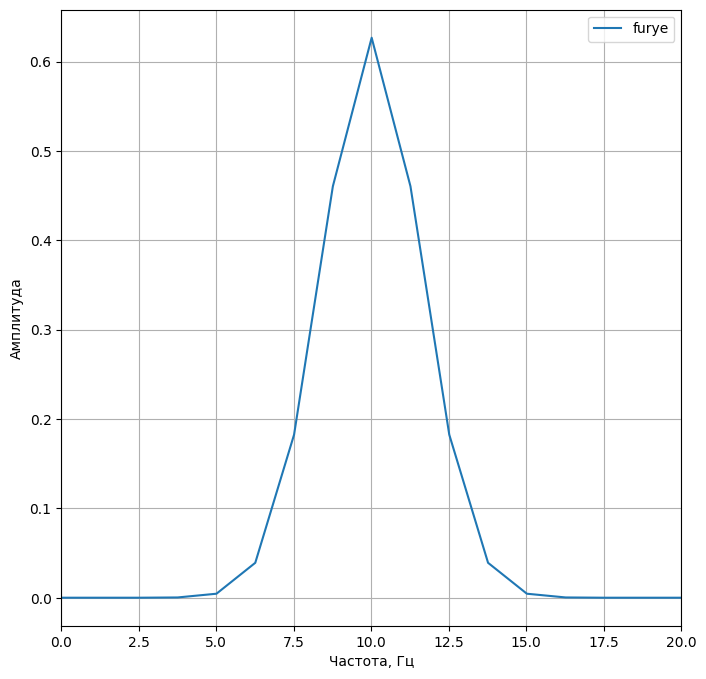

In [3]:
N = 800 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax 

x = np.arange(-4, 4, 0.01)
y = morle_wave(x, np.sqrt(2))

xf = np.linspace(0.0, fmax, N)
yff = fft(y)

yspc = morle_spectre(xf)

fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff), label= 'furye')
#plt.plot(xf, yspc, label= 'formula')
plt.xlim(0,20)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

<h1>TASK2</h1>

<p>Реализовать вейвлет “Мексиканская шляпа” во временном пространстве.
Посмотреть его спектр. Результат приведен на рис. 2.</p>

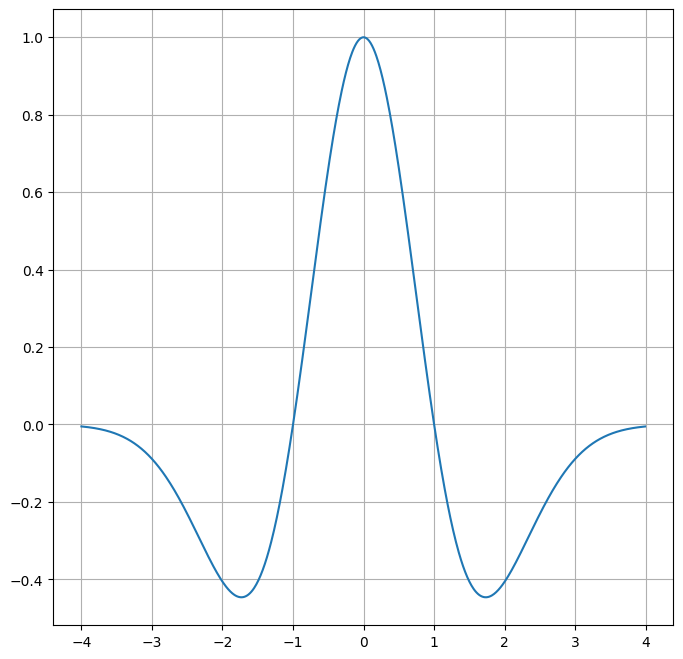

In [4]:
def hat(x):
    return (1 - x**2)*np.exp(-1 * x**2 / 2)

hat_wave = np.vectorize(hat)

fig = plt.figure(figsize=(8,8)) # размер полотна
x = np.arange(-4, 4, 0.01)
y = hat_wave(x)
plt.plot(x, y)
plt.grid()

Text(0, 0.5, 'Амплитуда')

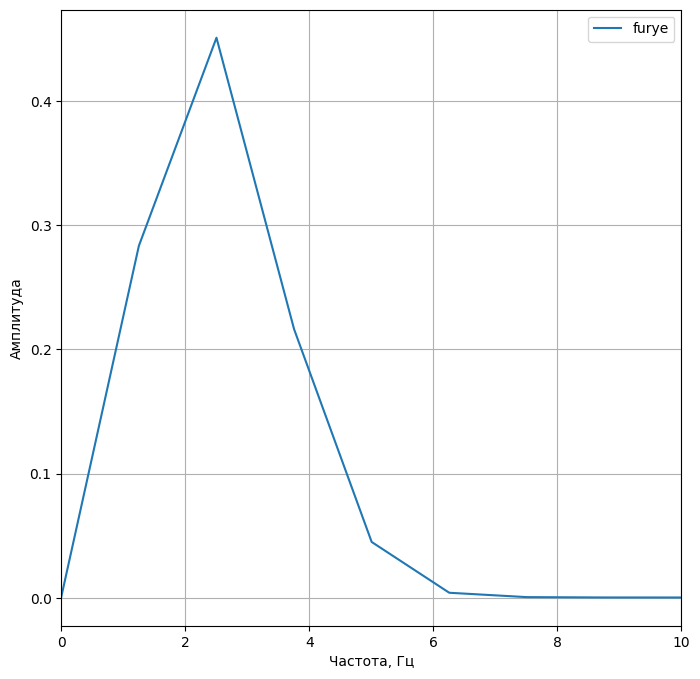

In [5]:
N = 800 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax 

x = np.arange(-4, 4, 0.01)
y = hat_wave(x)

xf = np.linspace(0.0, fmax, N)
yff = fft(y)


fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff), label= 'furye')
plt.xlim(0,10)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

<h1>TASK3</h1>

<p>Реализовать вейвлет Хаара во временном пространстве. Посмотреть его спектр.
Результат приведен на рис. 3.</p>

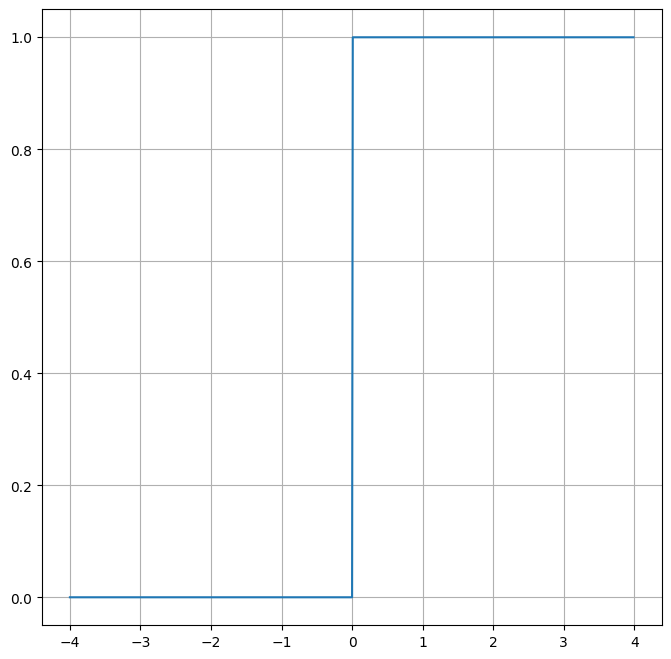

In [6]:
def haar(x, a):
    if (x >= 0) and (x < a/2):
        return 1
    elif (x >= a/2) and (x < a):
        return -1
    else:
        return 0

haar_wave = np.vectorize(haar)

fig = plt.figure(figsize=(8,8)) # размер полотна
x = np.arange(-4, 4, 0.01)
y = haar_wave(x, 10.0)
plt.plot(x, y)
plt.grid()

Text(0, 0.5, 'Амплитуда')

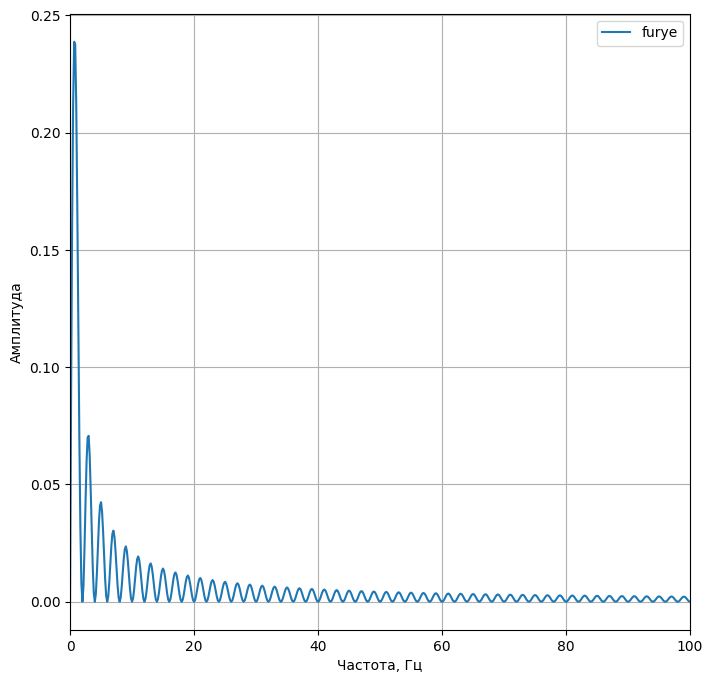

In [7]:
N = 6000 # Количество отсчетов
fmax=1000 # максимальная частота
T = 1.0/fmax 

x = np.arange(-30, 30, 0.01)
y = haar_wave(x, 10.0)

xf = np.linspace(0.0, fmax, N)
yff = fft(y)


fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff), label= 'furye')
plt.xlim(0,100)
plt.legend()
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

<h1>TASK4</h1>

<p>Рассмотреть произвольный сигнал с шумом.

Реализовать свертку сигнала с вейвлетами Морле, вейвлетом “Мексиканская шляпа” и
вейвлетом Хаара.

Осуществить фильтрацию сигналов с помощью этих 3-х вейвлетов.

Отметить сильные и слабые стороны каждого из вейвлетов.</p>

In [8]:
import random as rm
def noise(x):
    a = 1
    if rm.random() >= 0.5:
        return a*rm.random()
    else:
        return -a*rm.random() 


fnoise = np.vectorize(noise)


Text(0, 0.5, 'Амплитуда')

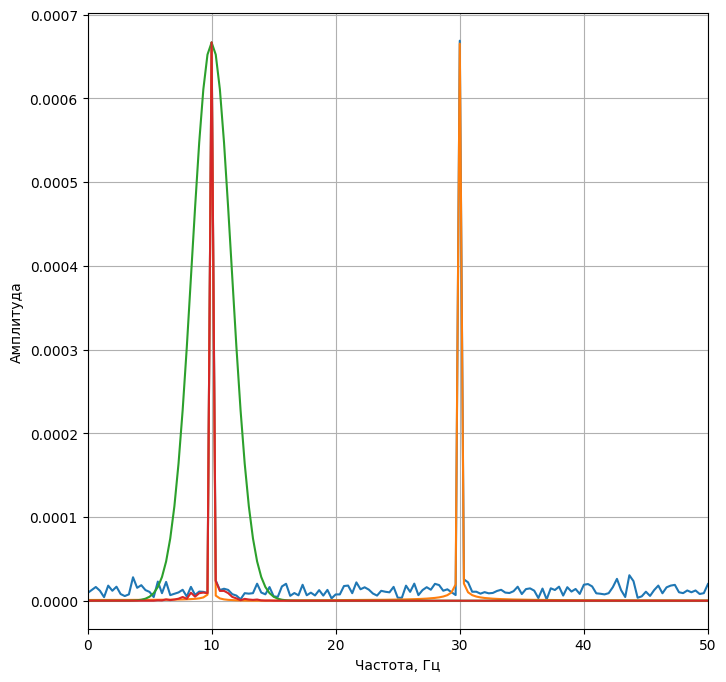

In [15]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax

x = np.linspace(0.0, N*T, N)

f = 10

#x = np.arange(0, 30.0, 0.01)

yf_orig = np.cos(2*f*np.pi*x) + np.cos(2*3*f*np.pi*x)
y_noised = yf_orig + fnoise(x)

yf_clear = fft(yf_orig)
yf_clear = yf_clear/np.max(yf_clear)

yf_noised = fft(y_noised)
yf_noised = yf_noised/np.max(yf_noised)

yf_func = yf_noised
yf_filtred_morle = yf_noised * yf_morle

xf = np.linspace(0.0, fmax/2, N//2)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yf_noised[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_clear[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_morle[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_filtred_morle[:N//2]))
plt.xlim(0,50)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

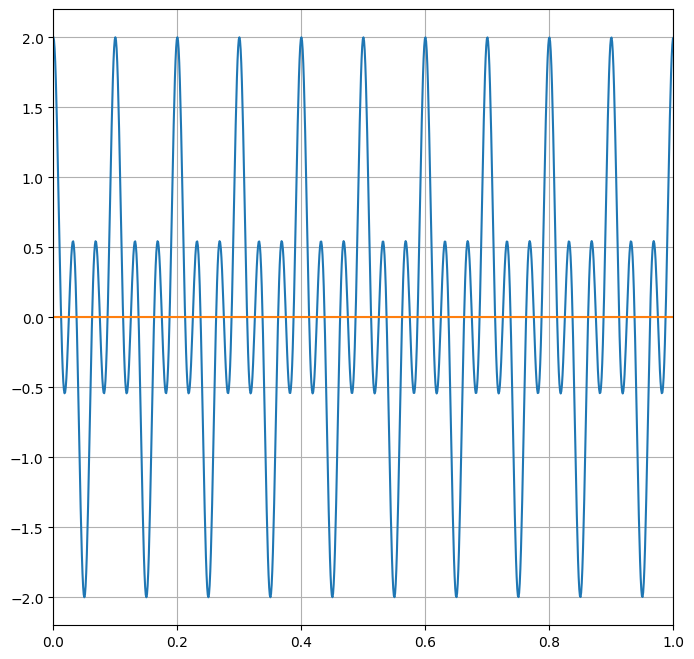

In [16]:
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(x, yf_orig)
plt.plot(x, y)
plt.xlim(0,1)
plt.grid()


Text(0, 0.5, 'Амплитуда')

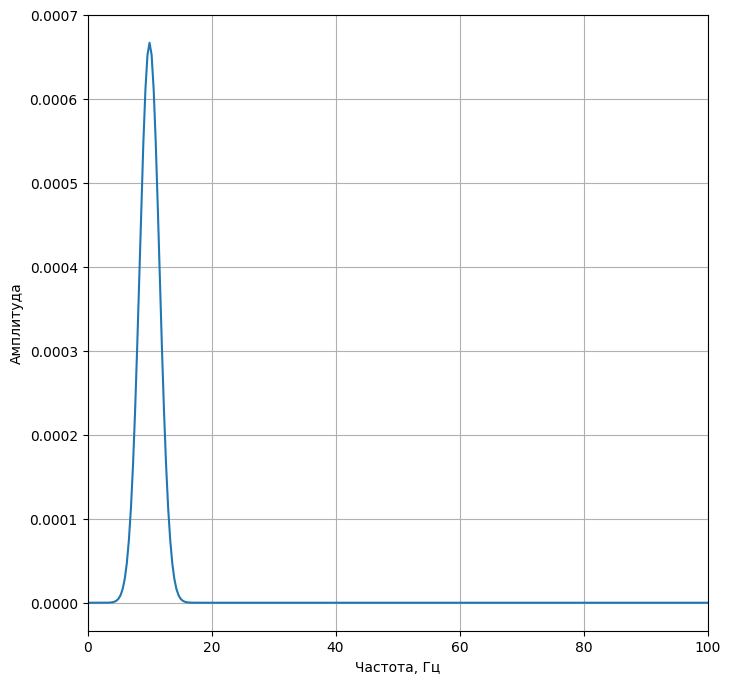

In [94]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
f = 10
x = np.arange(-15.0, 15.0, 0.01)
y = morle_wave(x, np.sqrt(2))

yff = fft(y)
yf_morle = yff/np.max(yff)
yf_morle = yf_morle[:N//2]
yf_morle = np.concatenate((yf_morle, np.flip(yf_morle)), axis=None)

xf = np.linspace(0.0, fmax, N)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yf_morle))
plt.xlim(0,100)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

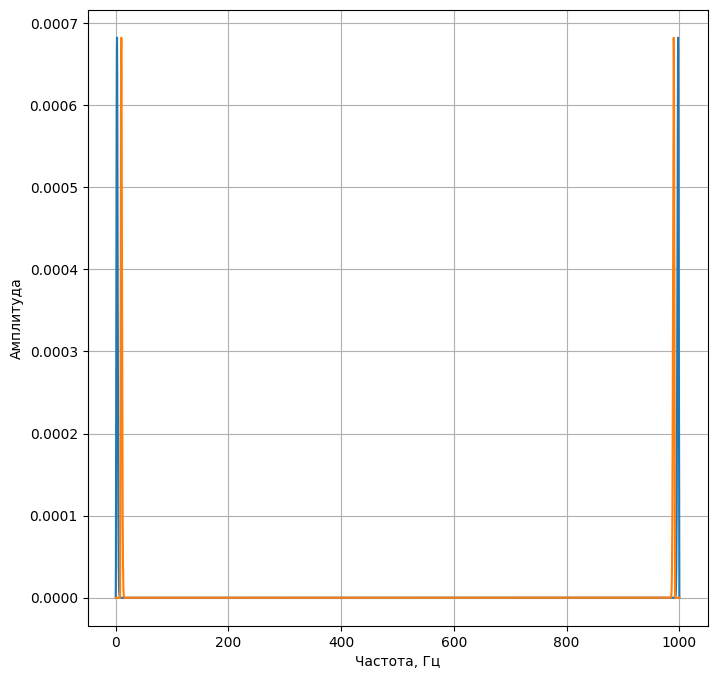

In [18]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
f = 10
x = np.arange(-15.0, 15.0, 0.01)
y = hat_wave(x)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
yf_hat = yff/np.max(yff)
yf_hat = yf_hat[:N//2]
yf_hat = np.concatenate((yf_hat, np.flip(yf_hat)), axis=None)

filt = int(N*10/fmax)-int(N*2.5/fmax)
yfc = np.concatenate((yf_hat[N//2-filt:N//2], yf_hat[0:N//2-filt]), axis=None)
yfc = np.concatenate((yfc, np.flip(yfc)), axis=None)

xf = np.linspace(0.0, fmax, N)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yf_hat))
plt.plot(xf, 2.0/N * np.abs(yfc))
#plt.xlim(0,50)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

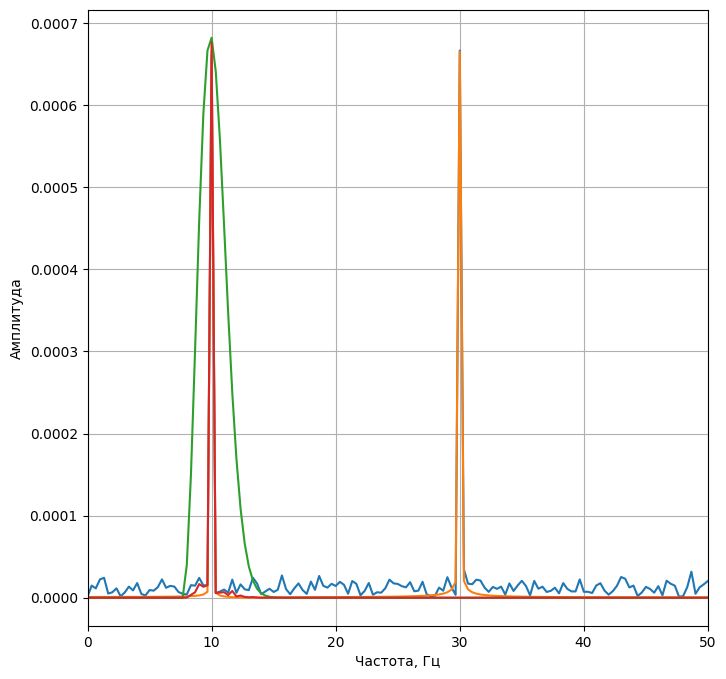

In [19]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax

x = np.linspace(0.0, N*T, N)

f = 10

#x = np.arange(0, 30.0, 0.01)

yf_orig = np.cos(2*f*np.pi*x) + np.cos(2*3*f*np.pi*x)
y_noised = yf_orig + fnoise(x)

yf_clear = fft(yf_orig)
yf_clear = yf_clear/np.max(yf_clear)

yf_noised = fft(y_noised)
yf_noised = yf_noised/np.max(yf_noised)

yf_func = yf_noised
yf_hat = yfc
yf_filtred_hat = yf_noised * yf_hat

xf = np.linspace(0.0, fmax/2, N//2)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yf_noised[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_clear[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_hat[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_filtred_hat[:N//2]))
plt.xlim(0,50)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

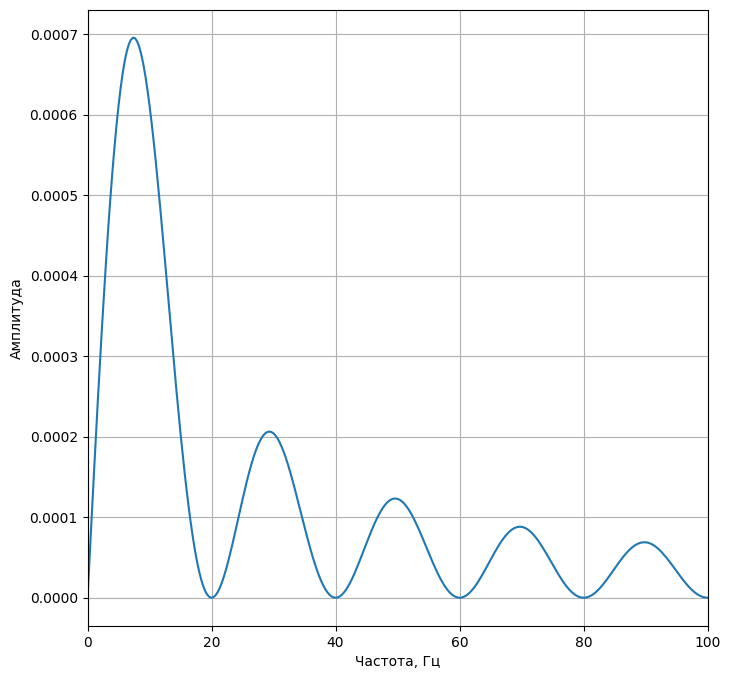

In [20]:
N =3000 # Количество отсчетов
fmax = 1000 # максимальная частота
f = 10
x = np.arange(-15.0, 15.0, 0.01)
y = haar_wave(x, 1.0)
xf = np.linspace(0.0, fmax/2, N//2)
yff = fft(y)
yf_haar = yff/np.max(yff)

xf = np.linspace(0.0, fmax, N)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yf_haar))
plt.xlim(0,100)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

Text(0, 0.5, 'Амплитуда')

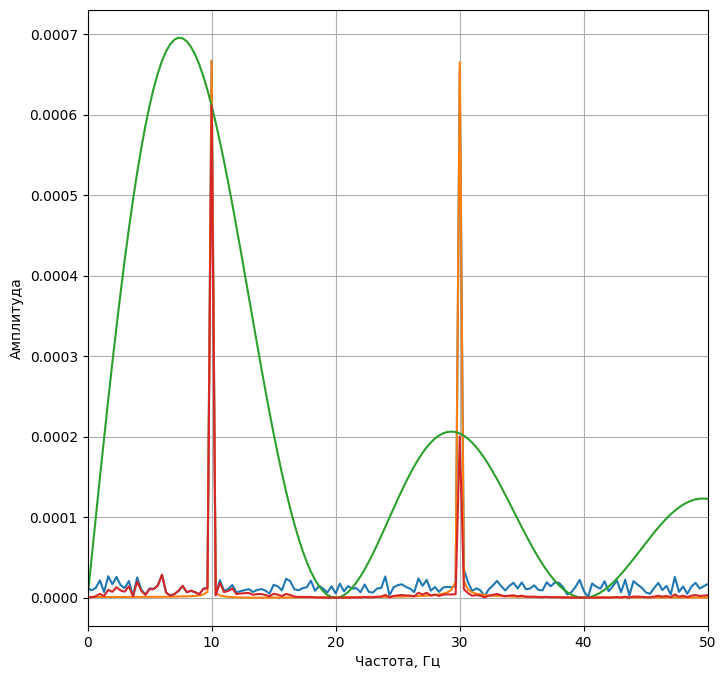

In [21]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax

x = np.linspace(0.0, N*T, N)

f = 10

#x = np.arange(0, 30.0, 0.01)

yf_orig = np.cos(2*f*np.pi*x) + np.cos(2*3*f*np.pi*x)
y_noised = yf_orig + fnoise(x)

yf_clear = fft(yf_orig)
yf_clear = yf_clear/np.max(yf_clear)

yf_noised = fft(y_noised)
yf_noised = yf_noised/np.max(yf_noised)

yf_func = yf_noised

yf_filtred_haar = yf_noised * yf_haar

xf = np.linspace(0.0, fmax/2, N//2)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yf_noised[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_clear[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_haar[:N//2]))
plt.plot(xf, 2.0/N * np.abs(yf_filtred_haar[:N//2]))
plt.xlim(0,50)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

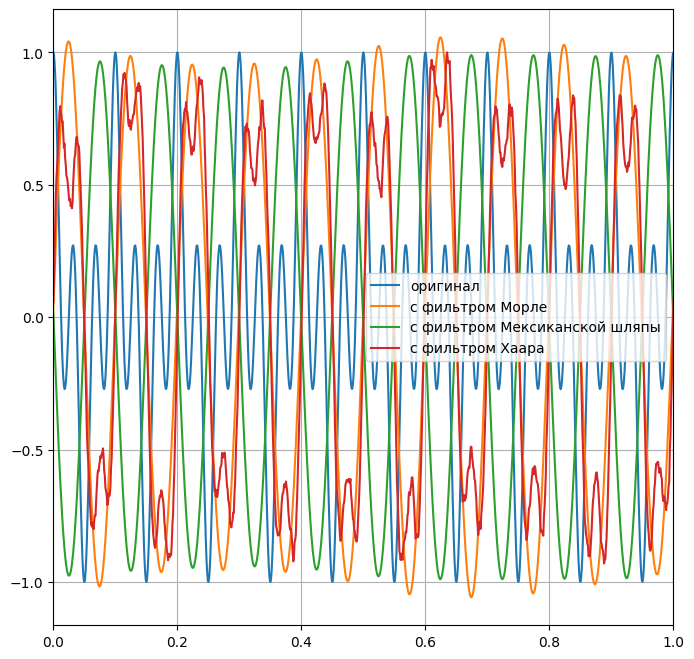

In [22]:
x = np.linspace(0.0, N*T, N)
yf_orig = ifft(yf_clear)
yf_orig = yf_orig/np.max(yf_orig)

yfff = ifft(yf_func)
yfff= yfff/np.max(yfff)

yflt1 = ifft(yf_filtred_morle)
yflt1 = yflt1/np.max(yflt1)

yflt2 = ifft(yf_filtred_hat)
yflt2 = yflt2/np.max(yflt2)

yflt3 = ifft(yf_filtred_haar)
yflt3 = yflt3/np.max(yflt3)

fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(x, yf_orig, label= 'оригинал')
#plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt1, label= 'с фильтром Морле')
plt.plot(x, yflt2, label= 'с фильтром Мексиканской шляпы')
plt.plot(x, yflt3, label= 'с фильтром Хаара')
plt.xlim(0, 1)
plt.legend()
plt.grid()

<h1>TASK5</h1>

<p>На рис 4.(а) приведен сигнал, частота которого меняется со временем. На рис 4.(б)
представлена спектрограмма данного сигнала, которая получена в результате сверки
сигнала с вейвлетом Морле. Реализовать данный код на языке программирования
Python. Разобраться в построении спектрограммы.</p>

Text(0, 0.5, 'Амплитуда')

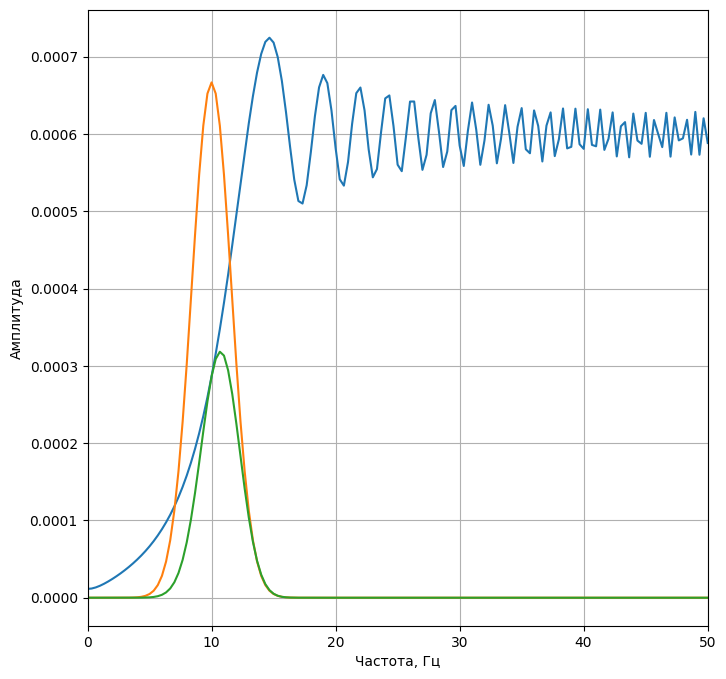

In [108]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax

x = np.linspace(0.0, N*T, N)

yf_func = chirp(x, f0=10, f1=100, t1=3, method='linear')
yff = fft(yf_func)
yff = np.abs(yff)/np.max(yff)
yf_filtred_morle = yff * yf_morle

xf = np.linspace(0.0, fmax, N)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff))
plt.plot(xf, 2.0/N * np.abs(yf_morle))
plt.plot(xf, 2.0/N * np.abs(yf_filtred_morle))
plt.xlim(0,50)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

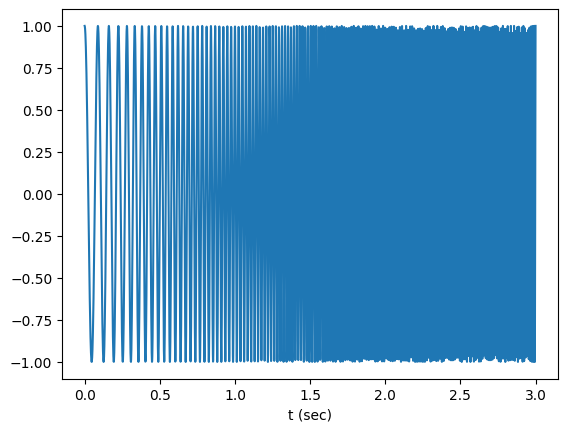

In [109]:
t = np.linspace(0.0, N*T, N)
w = chirp(t, f0=10, f1=100, t1=3, method='linear')
plt.plot(t, w)
plt.xlabel('t (sec)')
plt.show()

In [138]:
def furyemorle (f):
    N = 3000 # Количество отсчетов
    fmax = 1000 # максимальная частота
    x = np.arange(-15.0, 15.0, 0.01)
    y = morle_wave(x, 3)

    yff = fft(y)
    yf_morle = yff/np.max(yff)
    yf_morle = yf_morle[:N//2]
    yf_morle = np.concatenate((yf_morle, np.flip(yf_morle)), axis=None)


    filt = int(N*f/fmax)-int(N*10/fmax)
    yfc = np.concatenate((yf_morle[N//2-filt:N//2], yf_morle[0:N//2-filt]), axis=None)
    yfc = np.concatenate((yfc, np.flip(yfc)), axis=None)
    return yfc



Text(0, 0.5, 'Амплитуда')

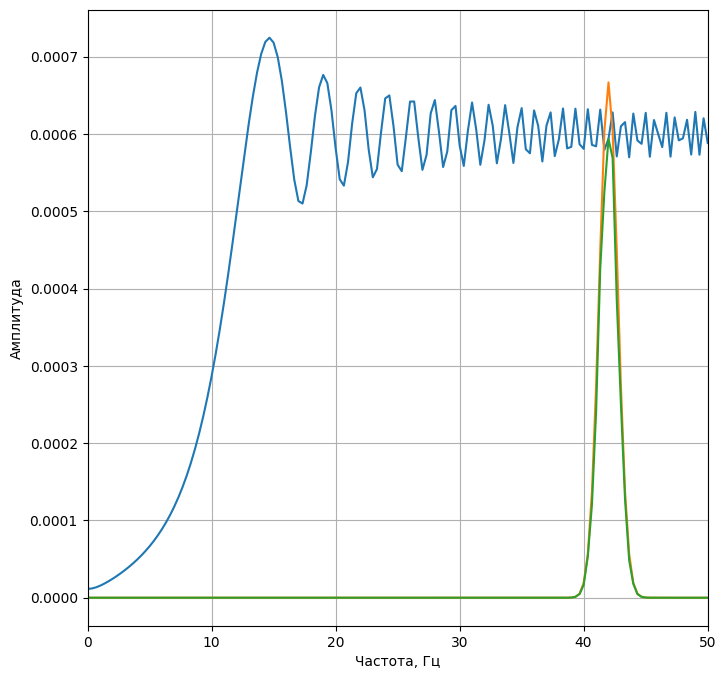

In [142]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax

x = np.linspace(0.0, N*T, N)

yf_func = chirp(x, f0=10, f1=100, t1=3, method='linear')
yff = fft(yf_func)
yff = np.abs(yff)/np.max(yff)
yf_filtred_morle = yff * furyemorle(42)

yfc = furyemorle(42)
xf = np.linspace(0.0, fmax, N)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(xf, 2.0/N * np.abs(yff))
plt.plot(xf, 2.0/N * np.abs(yfc))
plt.plot(xf, 2.0/N * np.abs(yf_filtred_morle))
plt.xlim(0,50)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')

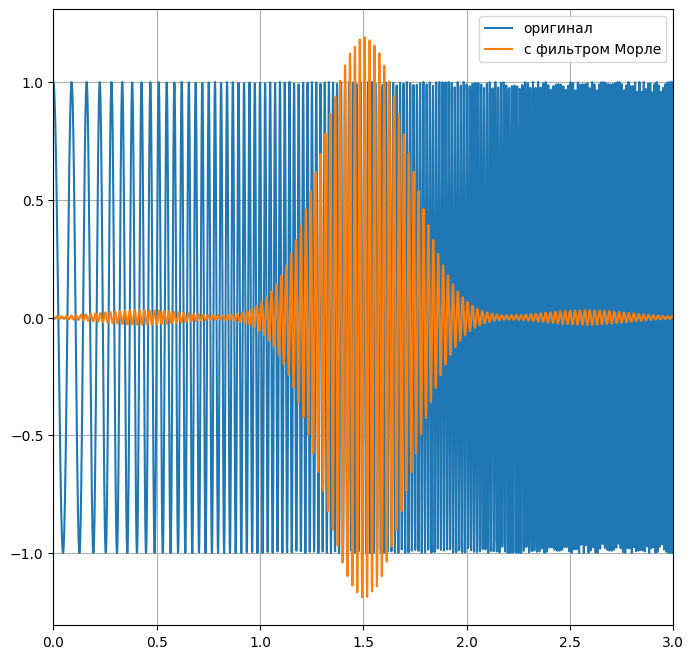

In [143]:
x = np.linspace(0.0, N*T, N)
yf_orig = yf_func

yfff = ifft(yf_func)
yfff= yfff/np.max(yfff)

yflt1 = ifft(yf_filtred_morle)
yflt1 = yflt1/np.max(yflt1)


fig = plt.figure(figsize=(8,8)) # размер полотна
plt.plot(x, yf_orig, label= 'оригинал')
#plt.plot(x, yfff, label= 'без фильтра')
plt.plot(x, yflt1, label= 'с фильтром Морле')
plt.xlim(0, 3)
plt.legend()
plt.grid()

In [129]:
from tqdm import tqdm
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax


x = np.arange(10.0, 100, 1)
xm = np.arange(-15.0, 15.0, 0.01)
spec = []
wavs = []

for i in tqdm(range(x.shape[0])):
    w = furyemorle(x[i])
    wavs.append(w)



xf = np.linspace(0.0, N*T, N)

func = chirp(xf, f0=10, f1=100, t1=3, method='linear')
yff = fft(func)
yff = np.abs(yff)/np.max(yff)

for w in wavs:
    conv = yff * w
    res = ifft(conv)
    res = res/np.max(res)
    spec.append(res)


100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [00:01<00:00, 61.62it/s]


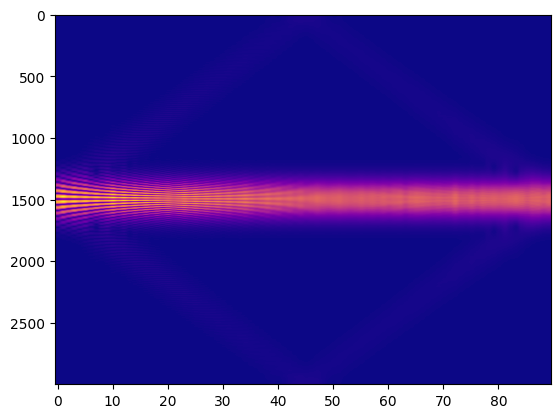

In [144]:
plt.imshow(np.abs(spec).transpose(), cmap='plasma', aspect='auto')

In [78]:
from tqdm import tqdm
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax

x = np.arange(1.0, 10, 0.01)
xm = np.arange(-100.0, 100.0, 0.1)
spectr = []

for i in tqdm(range(x.shape[0])):
    w = morle_wave(xm,x[i]+0.001)
    yconv = np.convolve(yf_func, w, 'same')
    spectr.append(yconv)


100%|███████████████████████████████████████████████████████████████████████████████| 900/900 [00:01<00:00, 460.50it/s]


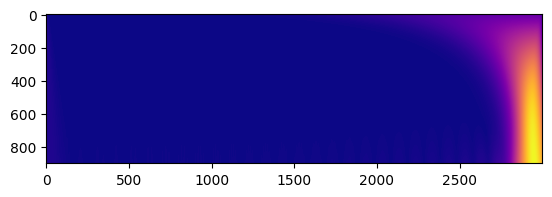

In [79]:
plt.imshow(np.abs(spectr), cmap='plasma')

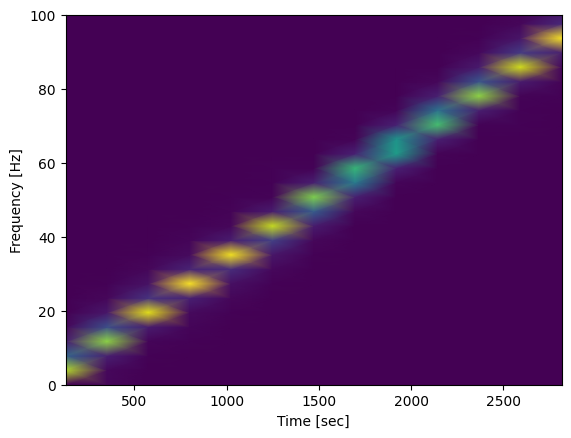

In [47]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()

f, t, Sxx = signal.spectrogram(w)
f=f*fmax
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,100)
plt.show()

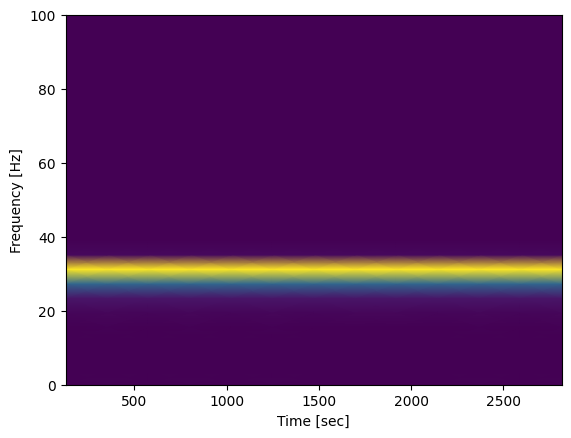

In [46]:
N = 3000 # Количество отсчетов
fmax = 1000 # максимальная частота
T = 1/fmax

x = np.linspace(0.0, N*T, N)
y = np.cos(30 * 2.0*np.pi*x)

f, t, Sxx = signal.spectrogram(y)
f = f * fmax
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(0,100)
plt.show()

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
T = 5.0     # seconds
Fs = 100.0 # Sample rate 
N = int(T * Fs) # Total number of samples

F1 = 10.0 # Frequency of signal 1
F2 = 20.0 # Frequency of signal 2

# Create a time array for each segment
t1 = np.linspace(0.0, T, N, endpoint=False)
t2 = np.linspace(T, 2*T, N, endpoint=False)

# Generate sinusoidal signal for each segment
s1 = np.sin(F1 * 2 * np.pi * t1)
s2 = np.sin(F2 * 2 * np.pi * t2)

# Combine the signals and the time arrays
s = np.concatenate([s1, s2])
t = np.concatenate([t1, t2])

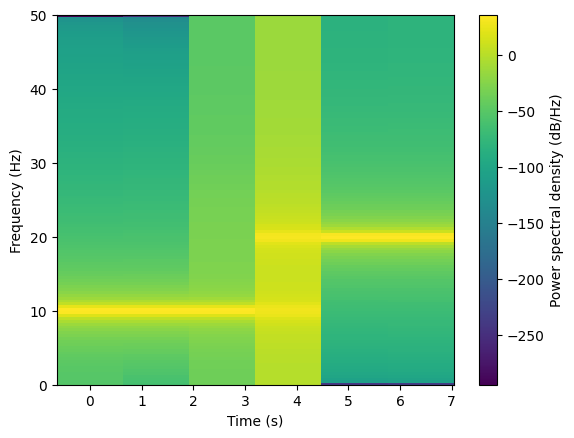

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters for the spectrogram
window_size = 256  # Window size for the FFT
overlap    = 128  # Overlap between windows

# Window the signal
window = np.hanning(window_size)
windows = [s[i:i+window_size] * window for i in range(0, len(s)-window_size, window_size-overlap)]

# Compute the FFT for each window
spectrogram = [np.abs(np.fft.rfft(win))**2 for win in windows]

# Transpose the result to have time on the x-axis and frequency on the y-axis
spectrogram = np.array(spectrogram).T

# Plot the spectrogram
frequencies = np.fft.rfftfreq(window_size, d=1.0/Fs)
time = np.arange(len(spectrogram[0])) * (window_size - overlap) / Fs
plt.pcolormesh(time, frequencies, 10 * np.log10(spectrogram))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power spectral density (dB/Hz)")
plt.ylim([0, Fs/2.])
plt.show()

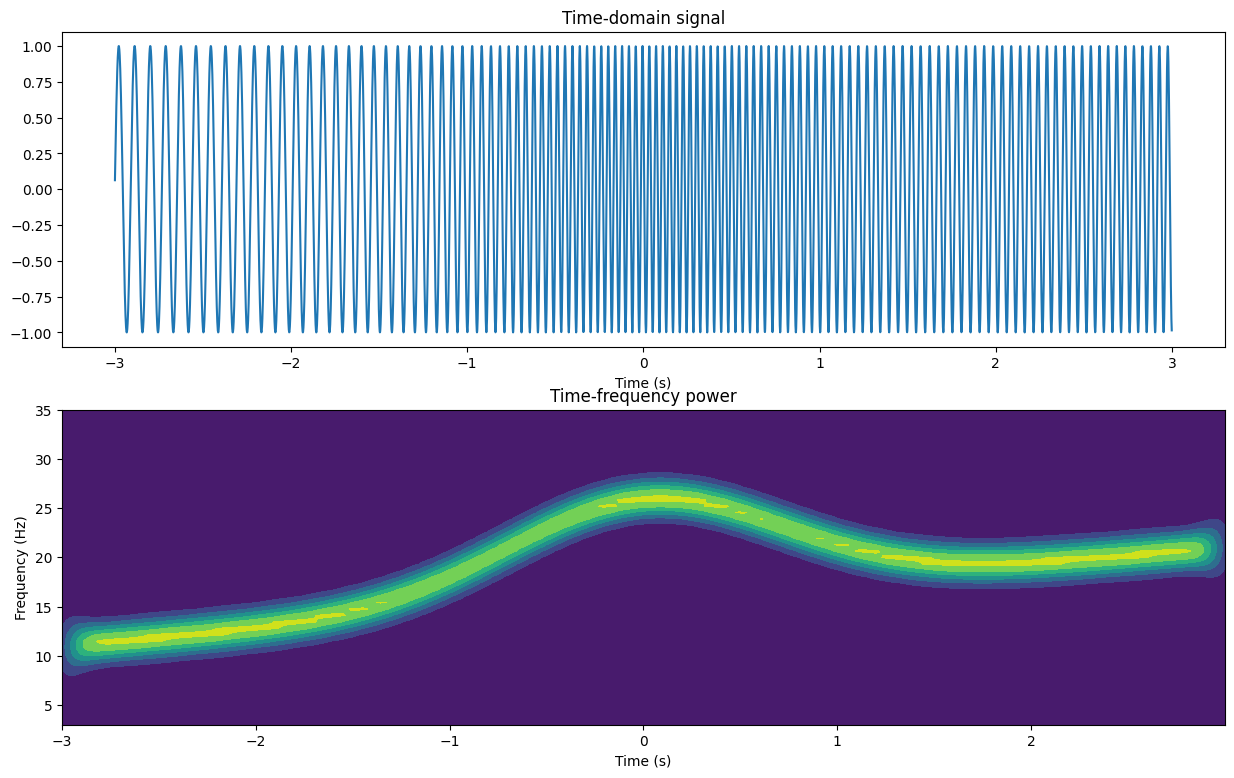

In [7]:
srate = 1000
time_points = np.arange(-3, 3, 1/srate)
#time_points = np.arange(0, 3, 1/srate)
num_points = len(time_points)

freq_modulation = np.exp(-time_points**2) * 10 + 10
freq_modulation += np.linspace(0, 10, num_points)
signal = np.sin(2 * np.pi * (time_points + np.cumsum(freq_modulation) / srate))
#signal =  chirp(time_points, f0=10, f1=100, t1=3, method='linear')

num_frequencies = 50
frequency_values = np.linspace(3, 35, num_frequencies)
fwhm = 0.2
wavelets = np.zeros((num_frequencies, len(time_points)), dtype=complex)

for wi in range(0, num_frequencies):
    gauss = np.exp(-(4 * np.log(2) * time_points**2) / fwhm**2)
    wavelets[wi, :] = np.exp(1j*2*np.pi*frequency_values[wi] * time_points) * gauss

convolution_size = num_points * 2 - 1
half_size = int(np.floor(num_points / 2) + 1)
signal_fft = scipy.fftpack.fft(signal, convolution_size)
tf_result = np.zeros((num_frequencies, len(time_points)))

for fi in range(0, num_frequencies):
    wavelet_fft = scipy.fftpack.fft(wavelets[fi,:], convolution_size)
    wavelet_fft = wavelet_fft / np.max(wavelet_fft)
    convolution_result = scipy.fftpack.ifft(wavelet_fft * signal_fft)
    convolution_result = convolution_result[half_size - 3 : -half_size]
    tf_result[fi, :] = np.abs(convolution_result)**2

plt.figure(figsize=(15, 9))
plt.subplot(2, 1, 1)
plt.plot(time_points, signal)
plt.xlabel('Time (s)')
plt.title('Time-domain signal')

plt.subplot(2, 1, 2)
plt.contourf(time_points, frequency_values, tf_result)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Time-frequency power')
plt.show()